# ***Install Packages***

In [ ]:
!pip install bnlp_toolkit
!pip install bnltk
!pip install -U bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 35.4 MB/s 
     |████████████████████████████████| 23.9 MB 1.4 MB/s 
     |████████████████████████████████| 965 kB 62.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=5fed4996d9900da5e3bbf3e2cdf59a552cd7ba68c0bc00d1a4374a01874b1606
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# ***Import Libraries***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords
from bnltk.stemmer import BanglaStemmer

from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from statistics import *
from tabulate import tabulate

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# ***Drive Connect***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/resturant_review(7612).csv')
data.head(20)

,Text,Sentiment
0,পিজাটা চমৎকার ছিল । আমি এবং আমার বন্ধুদের এটি ...,1
1,এরাবিয়ান মাস্টারের অভ্যন্তরীণ সজ্জাটা অনন্য। ...,1
2,কোরিয়ান এবং জামাইকান BBQ উপভোগ করার জন্য একটি...,1
3,BBQ এর মেনুগুলো সেরা।,1
4,শ্রেষ্ঠ স্বাদ ..... খাবারের মানও ভাল ....,1
5,সেরা পরিবেশ সঙ্গে শ্রেষ্ঠ স্বাদ। একেবারে প্রিম...,1
6,সত্যিই খেতে দারুণ টেস্ট !!! আমি শুধু BBQ ভালব...,1
7,মহান খাদ্য বাহ ভাল বাহ সঙ্গে মহান সেবা ..........,1
8,অসাধারণ এবং সুস্বাদু খাদ্য ... ভাল সার্ভিস এবং...,1
9,গরম এবং মসলাযুক্ত চিকেন ফ্রাইটা পছন্দনীয়। চমৎক...,1


# ***Data Ratio***

Negative: 350100.00%, Positive: 411100.00%


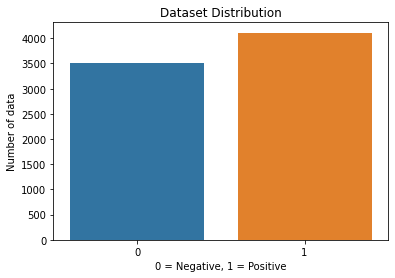

In [ ]:
import seaborn as sns
target_vc = data["Sentiment"].value_counts(normalize=False)
print("Negative: {:.2%}, Positive: {:.2%}".format(target_vc[0], target_vc[1]))
sns.barplot(x=target_vc.index, y=target_vc)
plt.title("Dataset Distribution")
plt.xlabel("0 = Negative, 1 = Positive")
plt.ylabel("Number of data")
plt.show()

In [ ]:
data.shape

(7612, 2)

# ***Data Pre-processing***

In [ ]:
#cleaning the texts
import re
corpus=[]
for i in range(0,7612):
    review = re.sub('[\!"#$%&()*,./:;<=>?@[\\]^`{|}~\t\n।+-]', ' ', data['Text'][i])
    review=review.replace('_',' ')
    review=review.replace('ঃ',' ')
    review = re.sub('[a-zA-Z0-9]+', ' ', review)    
    review = re.sub('[''````£|¢|/=।!“’<>‘॥”‰\']', ' ', review)               
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations 
                           u"\\U0001f90f" 
                           u"\\U0001f9cf"
                           u"\U0001fa78"  
                           "]+", flags=re.UNICODE)
    review=emoji_pattern.sub(r'', review)
    bn_stemmer = BanglaStemmer()
    review=bn_stemmer.stem(review)
    review = remove_stopwords(review, stopwords)
    review=' '.join(review)
    corpus.append(review)
corpus

['পিজাটা চমৎকার বন্ধুদের পছন্দ হয়েছে',
 'এরাবিয়ান মাস্টারের অভ্যন্তরীণ সজ্জাটা অনন্য এটির খাদ্য সুস্বাদু একটু মসলাযুক্ত কর্মীরা বন্ধুত্বপূর্ণ',
 'কোরিয়ান জামাইকান উপভোগ চমৎকার জায়গা',
 'মেনুগুলো সেরা',
 'শ্রেষ্ঠ স্বাদ খাবারের মানও ভাল',
 'সেরা পরিবেশ শ্রেষ্ঠ স্বাদ একেবারে প্রিমিয়াম মুরগি',
 'সত্যিই খেতে দারুণ টেস্ট ভালবাসি খাবারটা অসাধারণ জায়গায় ভালোবাসি ভাল',
 'মহান খাদ্য বাহ ভাল বাহ মহান সেবা',
 'অসাধারণ সুস্বাদু খাদ্য ভাল সার্ভিস নিশ্চিত জায়গাটা সেরা কোরিয়ান ভালোবাসি',
 'গরম মসলাযুক্ত চিকেন ফ্রাইটা পছন্দনীয় চমৎকার পরিবেশ আতিথেয়তা এটিকে ঢাকায় শীর্ষস্থানীয় রেস্তোরাঁর রেটিং দিব',
 'ব্রিলিয়ান্ট',
 'চিকেনটা অসাধারণ অপূর্ব',
 'সত্যিই ভাল জায়গা তুলনাহীন আচরণও ভাল সেরা আতিথেয়তা খাদ্য ভাল প্রতিটি খাদ্য সত্যিই মজাদার যুক্তিসংগত মূল্য জায়গাটি দম্পতি বন্ধু পরিবারের ভাল অভ্যন্তর নকশা সুন্দর সবকিছুই পছন্দ হয়েছে',
 'অপূর্ব খাবার গ্রেট সার্ভিস',
 'ডিনারের সত্যিই ভাল জায়গা জ্যামাইকান কোরিয়ান চিকেন উভয়ের টেস্টই ভাল কম্বিনেশন পিজাটা দুর্দান্ত পারলে ভালো লাগবে',
 'ভাল খাবার চমৎকার সেবা',


# ***Feature Selection***

# **TF-IDF**

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range = (1,2))
TM= cv.fit_transform(corpus).toarray()
y= data.iloc[:, 1].values

# **Spliting data for TF-IDF 80:20 Ratio**

In [ ]:
#Splitting the dataset into training set and test set
X_train,X_test,y_train,y_test= train_test_split(TM,y,test_size=0.2,random_state=2, stratify=data['Sentiment'])
print(TM)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# ***Machine Learning Classifier***

# **Result Table (M1)**

In [ ]:
evalution_table = []
evalution_table.append(['Classifier Name','Precision','Recall','Accuracy','F1-Score'])

# **Decision Tree using TF-IDF**

Confusion Matrix for Model 1 (DT)


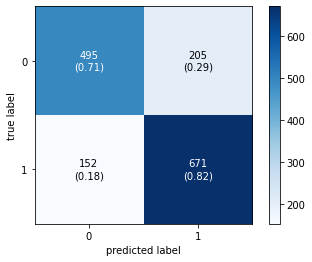

In [ ]:
#decision tree
classifier = DecisionTreeClassifier(criterion="entropy", random_state=5)
classifier.fit(X_train,y_train)
y_pred_DT = classifier.predict(X_test)

cm_DT = confusion_matrix(y_test,y_pred_DT)

pr_DT= precision_score(y_test, y_pred_DT, average=None)
re_DT= recall_score(y_test, y_pred_DT, average=None)
f1_DT= f1_score(y_test, y_pred_DT, average=None)
acc_DT = accuracy_score(y_test,y_pred_DT)

from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for Model 1 (DT)")
plot_confusion_matrix(conf_mat=cm_DT,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

evalution_table.append(['DT',pr_DT[0],re_DT[0],acc_DT,f1_DT[0]])

# **Random Forest using TF-IDF**

Confusion Matrix for Model 1 (RF)


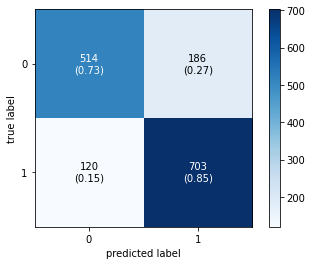

In [ ]:
#Random Forest
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=2)
classifier.fit(X_train,y_train)

y_pred_RF = classifier.predict(X_test)
cm_RF = confusion_matrix(y_test,y_pred_RF)
pr_RF= precision_score(y_test, y_pred_RF, average=None)
re_RF= recall_score(y_test, y_pred_RF, average=None)
f1_RF= f1_score(y_test, y_pred_RF, average=None)
acc_RF = accuracy_score(y_test,y_pred_RF)

from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for Model 1 (RF)")
plot_confusion_matrix(conf_mat=cm_RF,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

evalution_table.append(['RF',pr_RF[0],re_RF[0],acc_RF,f1_RF[0]])

# **Support Vector Machine using TF-IDF**

Confusion Matrix for Model 1 (SVM)


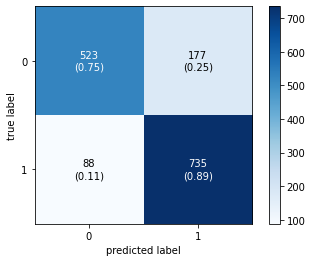

In [ ]:
#SVM
classifier = SVC(kernel='linear',gamma='auto')
classifier.fit(X_train,y_train)

y_pred_SVM = classifier.predict(X_test)
cm_SVM = confusion_matrix(y_test,y_pred_SVM)
pr_SVM= precision_score(y_test, y_pred_SVM, average=None)
re_SVM= recall_score(y_test, y_pred_SVM, average=None)
f1_SVM= f1_score(y_test, y_pred_SVM, average=None)
acc_SVM = accuracy_score(y_test,y_pred_SVM)

from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for Model 1 (SVM)")
plot_confusion_matrix(conf_mat=cm_SVM,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

evalution_table.append(['SVM',pr_SVM[0],re_SVM[0],acc_SVM,f1_SVM[0]])

# **KNN using TF-IDF**

Confusion Matrix for Model 1 (KNN)


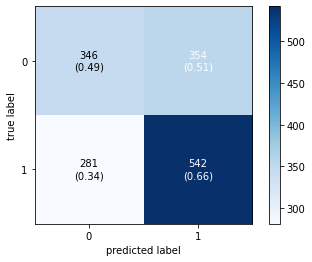

In [ ]:
#KNN
classifier = KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

y_pred_KNN = classifier.predict(X_test)
cm_KNN = confusion_matrix(y_test,y_pred_KNN)
pr_KNN = precision_score(y_test, y_pred_KNN, average=None)
re_KNN = recall_score(y_test, y_pred_KNN, average=None)
f1_KNN = f1_score(y_test, y_pred_KNN, average=None)
acc_KNN = accuracy_score(y_test,y_pred_KNN)

from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for Model 1 (KNN)")
plot_confusion_matrix(conf_mat=cm_KNN,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

evalution_table.append(['KNN',pr_KNN[0],re_KNN[0],acc_KNN,f1_KNN[0]])

# **NB using TF-IDF**

Confusion Matrix for Model 1 (NB)


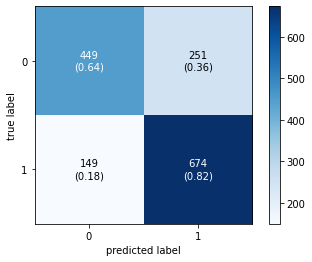

In [ ]:
#NB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred_NB = classifier.predict(X_test)
cm_NB = confusion_matrix(y_test,y_pred_NB)
pr_NB = precision_score(y_test, y_pred_NB, average=None)
re_NB = recall_score(y_test, y_pred_NB, average=None)
f1_NB = f1_score(y_test, y_pred_NB, average=None)
acc_NB = accuracy_score(y_test,y_pred_NB)

from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for Model 1 (NB)")
plot_confusion_matrix(conf_mat=cm_NB,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

evalution_table.append(['NB',pr_NB[0],re_NB[0],acc_NB,f1_NB[0]])

# ***Boosting Classifier***

# ***AdaBoosting using TF-IDF***

Confusion Matrix for Model 1 (Ada)


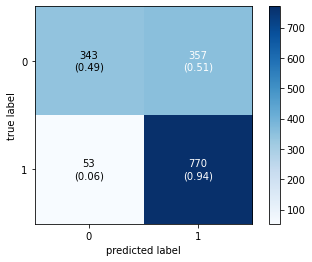

In [ ]:
#Ada Boosting
classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
classifier.fit(X_train,y_train)

y_pred_adab = classifier.predict(X_test)
cm_adab = confusion_matrix(y_test,y_pred_adab)
pr_adab = precision_score(y_test, y_pred_adab, average=None)
re_adab = recall_score(y_test, y_pred_adab, average=None)
f1_adab = f1_score(y_test, y_pred_adab, average=None)
acc_adab = accuracy_score(y_test,y_pred_adab)

from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for Model 1 (Ada)")
plot_confusion_matrix(conf_mat=cm_adab,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

evalution_table.append(['Ada',pr_adab[0],re_adab[0],acc_adab,f1_adab[0]])

# ***Gradinent Boosting using TF-IDF***

Confusion Matrix for Model 1 (GB)


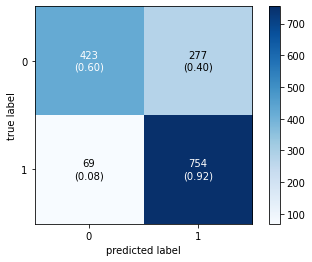

In [ ]:
#Ada Boosting
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
classifier.fit(X_train,y_train)

y_pred_gb = classifier.predict(X_test)
cm_gb = confusion_matrix(y_test,y_pred_gb)
pr_gb = precision_score(y_test, y_pred_gb, average=None)
re_gb = recall_score(y_test, y_pred_gb, average=None)
f1_gb = f1_score(y_test, y_pred_gb, average=None)
acc_gb = accuracy_score(y_test,y_pred_gb)

from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for Model 1 (GB)")
plot_confusion_matrix(conf_mat=cm_gb,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

evalution_table.append(['GB',pr_gb[0],re_gb[0],acc_gb,f1_gb[0]])

# **Result Analysis for TF-IDF**

In [ ]:
print("Results using TF-IDF")
print(tabulate(evalution_table))

Results using TF-IDF
---------------  ------------------  ------------------  ------------------  ------------------
Classifier Name  Precision           Recall              Accuracy            F1-Score
DT               0.7650695517774343  0.7071428571428572  0.7655942219304005  0.734966592427617
RF               0.8107255520504731  0.7342857142857143  0.799080761654629   0.7706146926536732
SVM              0.855973813420622   0.7471428571428571  0.8260013131976363  0.7978642257818459
KNN              0.5518341307814992  0.4942857142857143  0.5830597504924491  0.5214770158251695
NB               0.7508361204013378  0.6414285714285715  0.737360472751149   0.6918335901386748
Ada              0.8661616161616161  0.49                0.7307944845699278  0.6259124087591241
GB               0.8597560975609756  0.6042857142857143  0.7728168089297439  0.7097315436241611
---------------  ------------------  ------------------  ------------------  ------------------


# ***ROC Curve***

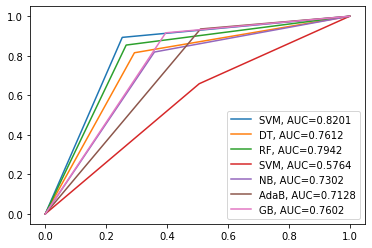

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_SVM)
auc = round(metrics.roc_auc_score(y_test, y_pred_SVM), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_DT)
auc = round(metrics.roc_auc_score(y_test, y_pred_DT), 4)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_RF)
auc = round(metrics.roc_auc_score(y_test, y_pred_RF), 4)
plt.plot(fpr,tpr,label="RF, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_KNN)
auc = round(metrics.roc_auc_score(y_test, y_pred_KNN), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_NB)
auc = round(metrics.roc_auc_score(y_test, y_pred_NB), 4)
plt.plot(fpr,tpr,label="NB, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_adab)
auc = round(metrics.roc_auc_score(y_test, y_pred_adab), 4)
plt.plot(fpr,tpr,label="AdaB, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_gb)
auc = round(metrics.roc_auc_score(y_test, y_pred_gb), 4)
plt.plot(fpr,tpr,label="GB, AUC="+str(auc))

plt.legend()